# Linear Data Classification Methods

### Logistic Regression

In classification the output variable of the classifier is a class label as we have seen in the case of Bayes Classifier. Let us denote the class label by $y$ and the data observations by $x$. As we know $y$ is a discrete variable that takes on a finite number of values. For instance in the case of binary classification, $y$ is either $0$ or $1$. In most of the cases the models are continuous functions. For instance we can have a model which predicts the outcome label $y$ as $f(x,w)$. But the incompatability between the RHS and LHS makes the determination of the parameters difficult.

For the present discussion assume that $y$ in 0 or 1 (Binary Classification). We model $p(y=1 | x) = f(x,w)$. Now since the LHS is a probability value which lies between 0 and 1, we would like to have the model function also to fall in this range. Therefore we choose a function that satifies $f:\Re \rightarrow (0,1)$. Sigmoid function is good choice with this property. 
       \begin{equation}
           f(x,w) = \frac{1}{1+e^{-w^Tx}}
       \end{equation}
       
Check for yourself that the function always lies in the interval $(0,1)$.

Now having chosen the model, we have to estimate the parameter of the model, $w$. For that let us go back to Maximum Likelihood estimation. Let the training data be $X=\{x_1,x_2, \cdots x_n \}, Y=\{y_1,y_2, \cdots y_n \}\; y_i \in \{0,1\} $. The class labels $y_i$s are assumed to be independent of each other given $x_i$s.

That is, 
     \begin{equation}
     P(Y|X) = \prod_{i}^{n} p(y_i |x_i)
     \end{equation}

Now we can write $p(y_i | x_i)$ as $p(y_i=1 | x_i)^{y_i}(1-p(y_i=1 | x_i))^{1-y_i}$.

Plugging this into the definition for $P(Y|X)$ we get
    \begin{equation}
       P(Y|X) = \prod_{i}^{n} p(y_i=1 | x_i)^{y_i}(1-p(y_i=1 | x_i))^{1-y_i}
    \end{equation}

This leads to the negative log likelihood function below <br>
  \begin{equation}
      - \sum_{i}^{n}\{ {y_i} log(p(y_i=1 | x_i)) + (1-y_i)log(1-p(y_i=1 | x_i)) \}
    \end{equation}

Into this function we can substitute our model $f(x,w)$ which represents the probability of $y_i = 1$ given $x_i$. So negative log likelihood becomes a function of $w$. In fact it is convex function in $w$. Therefore the maximum likelihood estimate of the model parameters $w$ and is : <br>
\begin{equation}
 \hat w, \hat b = \arg \min_{w} -\sum_{i}^{n}\{ {y_i} log(\frac{1}{1+e^{-w^Tx_i}}) + (1-y_i)log(1-\frac{1}{1+e^{-w^Tx_i}}) \}
\end{equation}

But unlike the case of mean and variance estimation in gaussian case we will not get a closed form solution. In this case we have to find an algorithmic solution for computing the estimate. Since the function is differentiable with respect to the parameters we employ gradient descent optimization procedure for minimizing nll.

###### Gradient Descent Procedure : 
Suppose we have a problem of minimizing a differentiable function $f(x)$ with respect to $x$. Gradient Descent Procedure is an iterative algorithm which updates the parameter $x$ in the opposite direction of gradient at each iteration. A rough outline of the algorithm is as follows: 
    

- gradientDescent(f)
     1. $x_0$ = randomn initial value
     2. do 
         1. grad = Gradient(f)
         2. $x_k = x_{k-1} - \eta$ grad
     3. Till Convergence
     
$\eta$ is called learning rate and is a small value like 0.01 and determines how far we must move in the oppposite direction of the gradient.

please go through the code below to understand how we optimize nll wrt $w$ using gradient descent procedure

### Understanding linear classification 
This section presents the how the solution of the logistic regression splits the input data space into two regions. The final classification algorithm as we did with bayes classifier is simple and works by comparing $p(y=1|x)$ and $p(y=0|x)$. Assignment of labels is done on the basis of which one is larger. That is the classifier assigns a data vector $x$ to class $1$ iff $p(y=1|x) > 0.5$. That is, $\frac{1}{1+e^{-w^Tx}} > 0.5$. By rearranging we get $e^{-w^Tx} < 1$ or ${-w^Tx} > 0$. That is $x$ falls on the positive side of the plane. Similarly we can find that to assign $x$ to class $0$ we need ${-w^Tx} < 0$. That is, actually we are checking on which side of the hyper plane the data is falling and decides the class assigned.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mline

#sigmoid function 1/(1+exp(-wTx)) which models the conditional prob. of y=1 given x
def sigmoid(w,x):
    w = w[:,np.newaxis] 
    pyx = 1/(1+np.exp(-w.T.dot(x)))
    return pyx

#computing the negative log likelihood of the data with the model parameters given by w.
def neg_ll(w,x,y):
    f = np.squeeze(sigmoid(w,x))
    y = np.squeeze(y)
    nll = 0
    for i,y_i in enumerate(y):
        nll += -(y_i*np.log(f[i]) + (1-y_i)*np.log(1-f[i]))
    return nll
        
#gradient of nll at the present w. The expression implemented here is obtained by differentiating the nll 
#expression with respect to w
def gradnll(w,x,y):
    f = np.squeeze(sigmoid(w,x))
    y = np.squeeze(y)
    grad = 0
    for i,y_i in enumerate(y):
        grad += (-y_i * (1-f[i]) + (1-y_i)*f[i])*x[:,i]
    return grad

#training the model using simple gradient descent procedure. the nll value at each iteration of the algorithm is stored
#list nll for plotting it vs the iteration count.It should decrease with iterations. Try to correspond the code with the
#simple gradient descent scheme given above.
def trainW(x,y):
    w = 0.1*np.random.randn(x.shape[0])
    nll = []
    maxiter = 1000 #maximum number of iterations of the algorithm.
    lr = 0.01#learning rate
    for i in range(maxiter):
        nll.append(neg_ll(w,x,y))#storing the cost (nll) at each iteration.
        grad = gradnll(w,x,y)#computing the gradient
        w = w - lr*grad#updating the weight using gradient descent.
    return w,nll
    
    

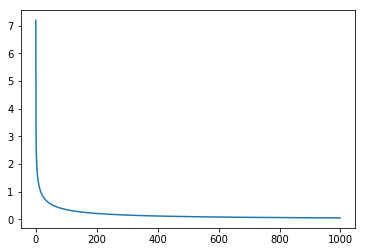

-17.129432618579184 17.48176037102866


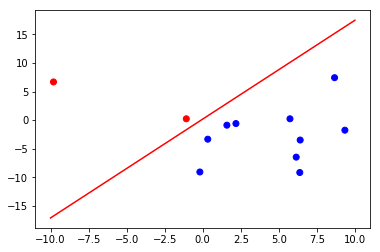

In [2]:
#*************************************************************************************
#this part of the program basically generates a set of linearly separated data shown in the final plot produced at 
#in the end. It produces max_count_1 and max_count_2 number of points on either either sides of a line. The data produced 
#stored in X and their labels in Y
max_count_1 = 2
max_count_2 = 10
X = np.ones([3,max_count_1+max_count_2])
Y = np.zeros([max_count_1+max_count_2])
cls1_count = 0
cls2_count = 0
w = np.array([4,-2])
w = w/np.sqrt((w*w).sum())
for i in range(300):
    x1 = np.random.uniform(-10,10)
    x2 = np.random.uniform(-10,10)
    if w[0]*x1 + w[1]*x2 < -1:
        if cls1_count < max_count_1:
            Y[cls1_count+cls2_count] = 0
            X[0,cls1_count+cls2_count],X[1,cls1_count+cls2_count] = x1,x2
            cls1_count = cls1_count+1
        else:
            pass
    if w[0]*x1 + w[1]*x2 > 1:
        if cls2_count < max_count_2:
            Y[cls1_count+cls2_count] = 1
            X[0,cls1_count+cls2_count],X[1,cls1_count+cls2_count] = x1,x2
            cls2_count = cls2_count+1
        else:
            pass
    if cls1_count == max_count_1 and cls2_count == max_count_2:
        break
#************************************************************************************************        
        
w_model,nll = trainW(X,Y)        
plt.plot(nll)
plt.show()
        
        
ax = plt.gca()
plt.x_min = -10
plt.x_max = 10
plt.y_min = -10
plt.y_max = 10
x_min = -10
y_min = (w_model[2]-w_model[0]*x_min)/w_model[1]
x_max = 10
y_max = (w_model[2]-w_model[0]*x_max)/w_model[1]
print(y_min,y_max)
line = mline.Line2D([x_min,x_max],[y_min,y_max], color='r')
ax.add_line(line)
c = ['r','b']
color = [c[int(Y[i])] for i in range(max_count_1+max_count_2)]
plt.scatter(X[0,:],X[1,:], color = color)
plt.show()
        
    
        

In [3]:
X.shape

(3, 12)